In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [3]:
zoo = pd.read_csv("Zoo.csv")

In [4]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [70]:
zoo["type"].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [71]:
zoo["type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [72]:
zoo.shape

(101, 18)

In [6]:
x = zoo.drop(["animal name","type"],axis=1)

In [7]:
y = zoo["type"]

In [10]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [9]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
x_train.shape,y_train.shape

((80, 16), (80,))

In [11]:
import matplotlib.pyplot as plt

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Text(0, 0.5, 'Cross-Validated Accuracy')

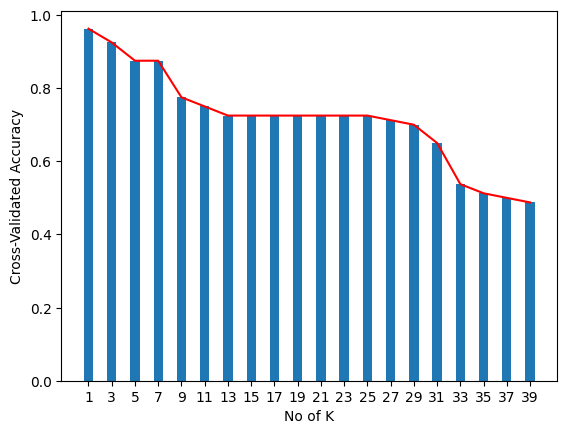

In [31]:
k_range = [2*i+1 for i in range(0,20)]
k_score = []

for i in k_range:
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn,x_train,y_train,cv=10)
  k_score.append(score.mean())

plt.bar(k_range,k_score)
plt.plot(k_range,k_score,color="r")
plt.xticks(k_range)
plt.xlabel("No of K")
plt.ylabel("Cross-Validated Accuracy")


In [33]:
scores = pd.DataFrame({"K_number":k_range,"Scores":k_score})

In [35]:
scores.head(10)

,K_number,Scores
0,1,0.9625
1,3,0.9250
2,5,0.8750
3,7,0.8750
4,9,0.7750
5,11,0.7500
6,13,0.7250
7,15,0.7250
8,17,0.7250
9,19,0.7250


Create the KNN Model

In [102]:
model = KNeighborsClassifier(n_neighbors = 7,p=2,metric="euclidean")

In [103]:
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [104]:
y_predict = model.predict(x_test)

In [105]:
y_predict

array([4, 5, 1, 6, 1, 6, 2, 2, 1, 6, 1, 2, 6, 2, 2, 6, 2, 6, 6, 4, 2])

In [106]:
print("Accuracy of the model is =",accuracy_score(y_predict,y_test))

Accuracy of the model is = 0.8095238095238095


In [107]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [108]:
cm = confusion_matrix(y_predict,y_test)

In [109]:
cm

array([[4, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 3],
       [0, 0, 0, 0, 0, 0, 0]])

In [110]:
import seaborn as sns

In [111]:
xlabels=[1,2,3,4,5,6,7]
ylabels=[1,2,3,4,5,6,7]


Text(50.722222222222214, 0.5, 'True Class')

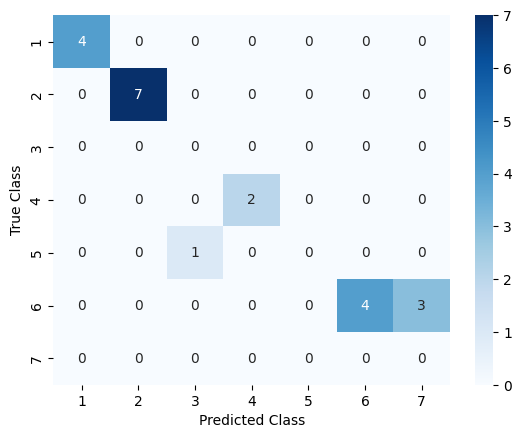

In [112]:
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=xlabels,yticklabels=ylabels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")